# ML Project 6033657523 - Linear Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the cleaned dataset

In [4]:
dataset = pd.read_csv('Final_data.csv')
X = dataset.drop(['Unnamed: 0','price'], axis=1)
y = dataset['price']

In [5]:
X

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,4,2,2,2,5,5,1,2.17,1
1,4,2,1,2,4,5,1,2.33,1
2,0,2,1,2,1,5,1,2.17,1
3,5,2,4,2,0,5,1,2.25,1
4,5,2,4,2,4,5,1,2.33,1
...,...,...,...,...,...,...,...,...,...
300148,5,1,4,0,2,3,0,10.08,49
300149,5,1,0,0,5,3,0,10.42,49
300150,5,1,1,0,5,3,0,13.83,49
300151,5,1,1,0,2,3,0,10.00,49


In [6]:
y

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 300153, dtype: int64

## Splitting the dataset into the Training set and Test set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [8]:
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(240122, 9) (240122,) (60031, 9) (60031,)


## Multiple Linear Regression

### Fitting Multiple Linear Regression to the Training Set

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [10]:
trainSet = pd.concat([X_train, y_train], axis = 1)
trainSet.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
148417,1,4,0,0,4,1,1,19.42,6,13524
36879,3,2,0,1,5,1,1,7.00,13,9940
274531,1,4,0,0,0,1,0,21.17,44,55983
166397,5,3,5,0,1,0,1,10.25,11,7927
272722,5,4,5,0,5,1,0,26.50,5,55502


In [11]:
testSet = pd.concat([X_test, y_test], axis = 1)
testSet.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
27131,1,2,4,0,1,4,1,19.75,40,7366
266857,5,4,4,0,5,5,0,9.83,42,64831
141228,5,4,4,0,5,0,1,10.50,41,6195
288329,5,1,5,0,4,2,0,14.50,14,60160
97334,1,0,0,0,5,5,1,8.25,20,6578


## Applying Grid Search to find the best model and the best parameter

## Evaluate model accuracy

In [12]:
y_pred = regressor.predict(X_test)
y_pred

array([ 4585.88050973, 52842.07707275,  7877.98018389, ...,
        5848.96550018, -1498.06191817, 58762.40634474])

In [13]:
predVal = pd.concat([X_test, y_test], axis = 1)
predVal.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
27131,1,2,4,0,1,4,1,19.75,40,7366
266857,5,4,4,0,5,5,0,9.83,42,64831
141228,5,4,4,0,5,0,1,10.50,41,6195
288329,5,1,5,0,4,2,0,14.50,14,60160
97334,1,0,0,0,5,5,1,8.25,20,6578


Compare GenPrice with PredictedGenPrice

In [14]:
datasetPredict = pd.concat([testSet.reset_index(), pd.Series(y_pred, name = 'PredictedPrice')], axis = 1).round(2)
datasetPredict.head(10)

,index,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,PredictedPrice
0,27131,1,2,4,0,1,4,1,19.75,40,7366,4585.88
1,266857,5,4,4,0,5,5,0,9.83,42,64831,52842.08
2,141228,5,4,4,0,5,0,1,10.50,41,6195,7877.98
3,288329,5,1,5,0,4,2,0,14.50,14,60160,56120.14
4,97334,1,0,0,0,5,5,1,8.25,20,6578,6663.20
5,135931,0,4,1,0,0,0,1,10.83,5,4555,6829.59
6,290630,5,1,0,2,0,5,0,2.00,7,23838,48754.68
7,141944,3,4,1,0,0,0,1,7.75,46,3860,4020.66
8,244517,1,5,5,0,5,1,0,26.33,44,32230,49953.51
9,215903,5,2,5,0,2,4,0,20.17,2,76841,58193.51


In [15]:
datasetPredict.corr()

,index,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,PredictedPrice
index,1.000000,0.184656,-0.087756,0.091498,-0.128608,0.026470,0.020889,-0.801685,0.167555,0.019587,0.760820,0.797156
airline,0.184656,1.000000,-0.030061,0.052285,-0.027956,0.037172,-0.026444,-0.183062,-0.001198,-0.010591,0.247096,0.259527
source_city,-0.087756,-0.030061,1.000000,0.000629,0.002251,0.039460,-0.219337,-0.002933,0.007664,-0.007628,0.006965,0.007924
departure_time,0.091498,0.052285,0.000629,1.000000,-0.015022,-0.045902,-0.001146,-0.055038,0.090452,0.000632,0.060217,0.063234
stops,-0.128608,-0.027956,0.002251,-0.015022,1.000000,0.004413,-0.010485,0.103969,-0.472470,-0.015345,-0.203027,-0.215543
arrival_time,0.026470,0.037172,0.039460,-0.045902,0.004413,1.000000,-0.035265,-0.022071,0.010202,-0.008933,0.038758,0.039609
destination_city,0.020889,-0.026444,-0.219337,-0.001146,-0.010485,-0.035265,1.000000,-0.001194,0.003362,-0.005631,0.006989,0.008007
class,-0.801685,-0.183062,-0.002933,-0.055038,0.103969,-0.022071,-0.001194,1.000000,-0.145016,0.012049,-0.938095,-0.986247
duration,0.167555,-0.001198,0.007664,0.090452,-0.472470,0.010202,0.003362,-0.145016,1.000000,-0.035719,0.208457,0.220189
days_left,0.019587,-0.010591,-0.007628,0.000632,-0.015345,-0.008933,-0.005631,0.012049,-0.035719,1.000000,-0.091088,-0.094350


In [16]:
print("Training set accuracy = " + str(regressor.score(X_train, y_train)))
print("Test set accuracy = " + str(regressor.score(X_test, y_test)))

Training set accuracy = 0.904621708988755
Test set accuracy = 0.904554350718816


### MSE

In [17]:
from sklearn import metrics
print('MSE:', metrics.mean_squared_error(y_test, y_pred))

MSE: 49200540.29372198


### MAPE

In [18]:
def mean_absolute_percentage_error(y_test, y_pred):
  y_test, y_pred = np.array(y_test), np.array(y_pred)
  return np.mean(np.abs((y_test - y_pred)/y_test)) * 100

print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))

MAPE: 43.53581089683511


### Visualize

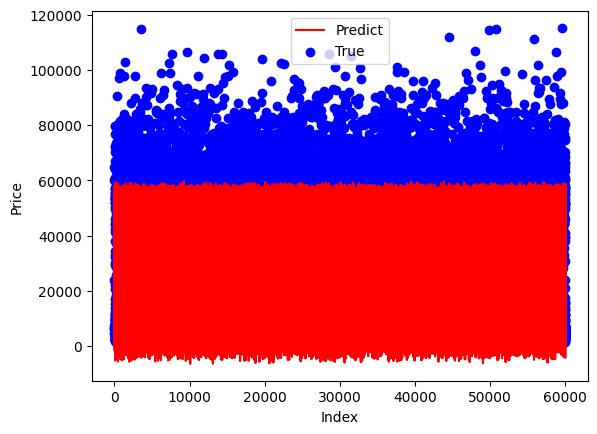

In [19]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(y_pred))], y_pred, color = 'r')
plt.scatter([i for i in range(len(y_pred))], y_test, color = 'b')
plt.ylabel('Price')
plt.xlabel('Index')
plt.legend(['Predict', 'True'], loc = 'best')
plt.show()

## Building the optimal model using Backward Elimination

In [22]:
import statsmodels.api as sm

In [24]:
X_opt = X_opt = dataset.drop(['price'], axis=1)
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
print(regressor_OLS.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.896
Model:                            OLS   Adj. R-squared (uncentered):              0.896
Method:                 Least Squares   F-statistic:                          2.592e+05
Date:                Sat, 09 Mar 2024   Prob (F-statistic):                        0.00
Time:                        22:40:07   Log-Likelihood:                     -3.1885e+06
No. Observations:              300153   AIC:                                  6.377e+06
Df Residuals:                  300143   BIC:                                  6.377e+06
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [25]:
X_opt = dataset.drop(['price'], axis=1)
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
print(regressor_OLS.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.896
Model:                            OLS   Adj. R-squared (uncentered):              0.896
Method:                 Least Squares   F-statistic:                          2.592e+05
Date:                Sat, 09 Mar 2024   Prob (F-statistic):                        0.00
Time:                        22:40:17   Log-Likelihood:                     -3.1885e+06
No. Observations:              300153   AIC:                                  6.377e+06
Df Residuals:                  300143   BIC:                                  6.377e+06
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [26]:
X_opt_train, X_opt_test, y_train, y_test = train_test_split(X_opt, y, test_size = 0.2, random_state = 0)
regressor_opt = LinearRegression()
regressor_opt.fit(X_opt_train, y_train)
y_pred2 = regressor_opt.predict(X_opt_test)

In [27]:
datasetPredict = pd.concat([testSet.reset_index(), pd.Series(y_pred2, name = 'PredictedPrice')], axis = 1).round(2)
datasetPredict.head()

,index,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,PredictedPrice
0,27131,1,2,4,0,1,4,1,19.75,40,7366,12914.89
1,266857,5,4,4,0,5,5,0,9.83,42,64831,51349.51
2,141228,5,4,4,0,5,0,1,10.50,41,6195,344.32
3,288329,5,1,5,0,4,2,0,14.50,14,60160,-2770.71
4,97334,1,0,0,0,5,5,1,8.25,20,6578,6119.66


In [28]:
print("Training set accuracy = " + str(regressor_opt.score(X_opt_train, y_train)))
print("Test set accuracy = " + str(regressor_opt.score(X_opt_test, y_test)))

Training set accuracy = 0.9044745832638349
Test set accuracy = 0.9052610323485347


Compare with old dataset <br>
Training set accuracy = 0.9744516391509681<br>
Test set accuracy = 0.9662655869064142<br>
= Backward elimination doesn't works